<a href="https://colab.research.google.com/github/mdna-j/CS471/blob/main/CS_471_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
uciml_iris_path = kagglehub.dataset_download('uciml/iris')

print('Data source import complete.')


Data source import complete.



Iris Dataset (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Data Splits:
Training set size: 90
Validation set size: 30
Test set size: 30

Validation Accuracy (Default Parameters): 0.9333333333333333

Best Hyperparameters:
{'max_depth': 2, 'min_samples_split': 2}


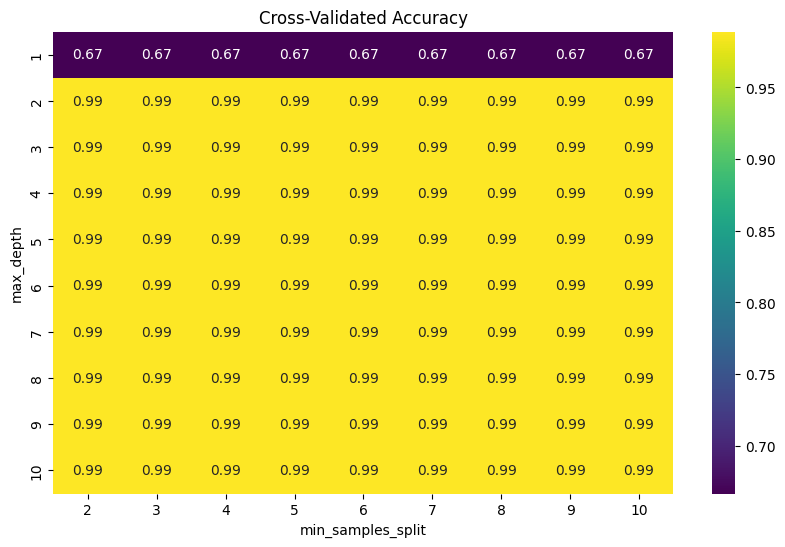


Classification Report on Test Data:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



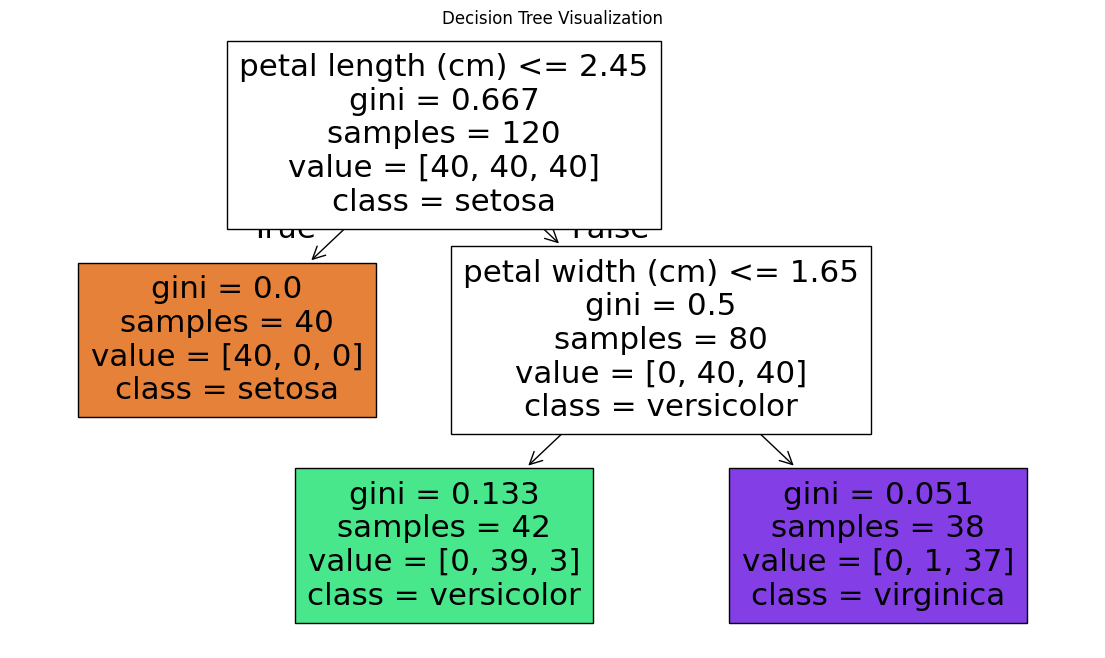

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
# -----------------------------
# 📌 Task 1: Load and Describe Data
# -----------------------------

# Load dataset
iris = load_iris()
X = iris.data  # features
y = iris.target  # labels
feature_names = iris.feature_names
label_names = iris.target_names

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [label_names[i] for i in y]

# Display first few rows
print("\nIris Dataset (first 5 rows):")
print(df.head())

# Explanation:
# - The Iris dataset includes 4 features: sepal length, sepal width, petal length, and petal width.
# - We have 3 label species: setosa, versicolor, virginica.
# - Our task is to predict the species based on these 4 features.
# - Decision Trees are great for this task because they are interpretable and can capture non-linear patterns.

# -----------------------------
# 📌 Task 2: Split the Data
# -----------------------------

# First split into train+val and test (80% / 20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Then split train+val into train and val (75% / 25% of 80%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print("\nData Splits:")
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

# -----------------------------
# 📌 Task 3: Train a Basic Decision Tree
# -----------------------------

dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

# Evaluate on validation set
val_preds = dt_default.predict(X_val)
val_acc = accuracy_score(y_val, val_preds)
print("\nValidation Accuracy (Default Parameters):", val_acc)

# -----------------------------
# 📌 Task 4: Hyperparameter Tuning (max_depth & min_samples_split)
# -----------------------------

param_grid = {
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 11)
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("\nBest Hyperparameters:")
print(grid.best_params_)

# Plotting results
results = pd.DataFrame(grid.cv_results_)

# Heatmap for max_depth vs min_samples_split
pivot = results.pivot(index='param_max_depth', columns='param_min_samples_split', values='mean_test_score')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='viridis')
plt.title("Cross-Validated Accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.show()

# Explanation:
# - We chose `max_depth` because it controls tree complexity.
# - `min_samples_split` controls the minimum number of samples to consider splitting a node.
# - GridSearchCV helps find the best combination based on cross-validation accuracy.

# -----------------------------
# 📌 Task 5: Retrain on Train + Val with Best Parameters
# -----------------------------

# Combine training and validation sets
X_final_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_val)])
y_final_train = pd.concat([pd.Series(y_train), pd.Series(y_val)])

best_model = DecisionTreeClassifier(**grid.best_params_, random_state=42)
best_model.fit(X_final_train, y_final_train)

test_preds = best_model.predict(X_test)

print("\nClassification Report on Test Data:")
print(classification_report(y_test, test_preds, target_names=label_names))

# -----------------------------
# 📌 Task 6: Visualize and Interpret the Tree
# -----------------------------

plt.figure(figsize=(14, 8))
plot_tree(best_model, feature_names=feature_names, class_names=label_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Explanation:
# - The decision tree visualization shows how decisions are made based on features.
# - You can see how thresholds on petal length or width help classify the flower type.
# - The filled colors show the majority class in each node.

